# Empathetic Dialogues

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os
import json

In [54]:
emp_df = pd.read_csv('./appraised_dialogues/google-t5_empdial_train.csv')
cols = list(emp_df.columns)
col_list = []
ind_list = []
for col in cols:
    if '_sp1' in col:
        col_list.append(col)
    elif '_sp2' in col:
        ind_list.append(col)

emp_df_sp1 = emp_df[col_list]
emp_df_sp2 = emp_df[ind_list]
# corr_matrix_aloe_corr = df_aloe_target.corrwith(df_aloe_observer)
# print(corr_matrix_aloe_corr)
# # aloe target text plot
# plot_matrix(corr_matrix_aloe_corr)

correlation_data = {}

for col in col_list:
    for ind in ind_list:
        if col not in list(correlation_data.keys()):
            correlation_data[col] = list()
        correlation_data[col].append(emp_df_sp1[col].corr(emp_df_sp2[ind]))

In [55]:
correlation_df = pd.DataFrame(correlation_data, index=ind_list)
correlation_df

,familiarity_sp1,goal_support_sp1,suddenness_sp1,social_norms_sp1,not_consider_sp1,chance_responsblt_sp1,self_responsblt_sp1,other_control_sp1,pleasantness_sp1,predict_conseq_sp1,accept_conseq_sp1,predict_event_sp1,urgency_sp1,other_responsblt_sp1,self_control_sp1,chance_control_sp1,standards_sp1,goal_relevance_sp1,attention_sp1,unpleasantness_sp1
familiarity_sp2,0.255365,0.172028,-0.252149,-0.148998,-0.159704,-0.145481,0.182955,-0.082660,0.166938,0.114833,0.103571,0.164826,-0.177931,-0.107754,0.210588,-0.132309,-0.167294,-0.022611,-0.091019,-0.165033
goal_support_sp2,0.188743,0.340575,-0.238072,-0.288227,-0.337450,-0.249249,0.196633,0.033988,0.397485,0.191603,0.170312,0.155478,-0.123121,-0.014169,0.204093,-0.202683,-0.326660,0.100259,-0.025525,-0.409621
suddenness_sp2,-0.241220,-0.174078,0.228931,0.156595,0.174909,0.188652,-0.160404,0.059185,-0.217818,-0.128423,-0.079707,-0.123159,0.168954,0.056077,-0.169353,0.167286,0.185266,-0.028806,0.069855,0.232315
social_norms_sp2,-0.161423,-0.292674,0.224411,0.293515,0.294306,0.195021,-0.200908,0.045129,-0.342354,-0.168312,-0.153350,-0.145422,0.124553,0.084136,-0.189383,0.159839,0.311903,-0.074380,0.044245,0.360838
not_consider_sp2,-0.165078,-0.335497,0.225670,0.281881,0.358439,0.243823,-0.189186,-0.041932,-0.402790,-0.164965,-0.183785,-0.133478,0.101952,0.013091,-0.192626,0.202692,0.336196,-0.075954,0.039714,0.412430
chance_responsblt_sp2,-0.139993,-0.251736,0.206490,0.195220,0.243516,0.258055,-0.181111,-0.019540,-0.252431,-0.124483,-0.179104,-0.144605,0.110223,0.048077,-0.190932,0.192832,0.224771,-0.031801,0.020725,0.254175
self_responsblt_sp2,0.178181,0.145196,-0.169676,-0.134062,-0.154641,-0.171788,0.153310,-0.074715,0.203024,0.103631,0.084057,0.077807,-0.143599,-0.047821,0.136419,-0.160071,-0.161797,0.026081,-0.053731,-0.224743
other_control_sp2,-0.066390,0.080131,0.024856,-0.014217,-0.080584,-0.017896,-0.040517,0.210017,0.072950,0.020143,0.019587,0.011342,0.102941,0.122421,-0.018153,0.009050,-0.022501,0.084241,0.062284,-0.049459
pleasantness_sp2,0.153550,0.400589,-0.264645,-0.344118,-0.403375,-0.243099,0.233838,0.043559,0.445021,0.185568,0.216789,0.187891,-0.092533,-0.050764,0.238565,-0.192650,-0.389761,0.099973,-0.028282,-0.436018
predict_conseq_sp2,0.128890,0.174903,-0.162892,-0.160190,-0.156233,-0.104206,0.147085,-0.019653,0.177645,0.161828,0.083559,0.131103,-0.092166,-0.046567,0.142828,-0.087381,-0.155562,0.085251,0.021175,-0.176431


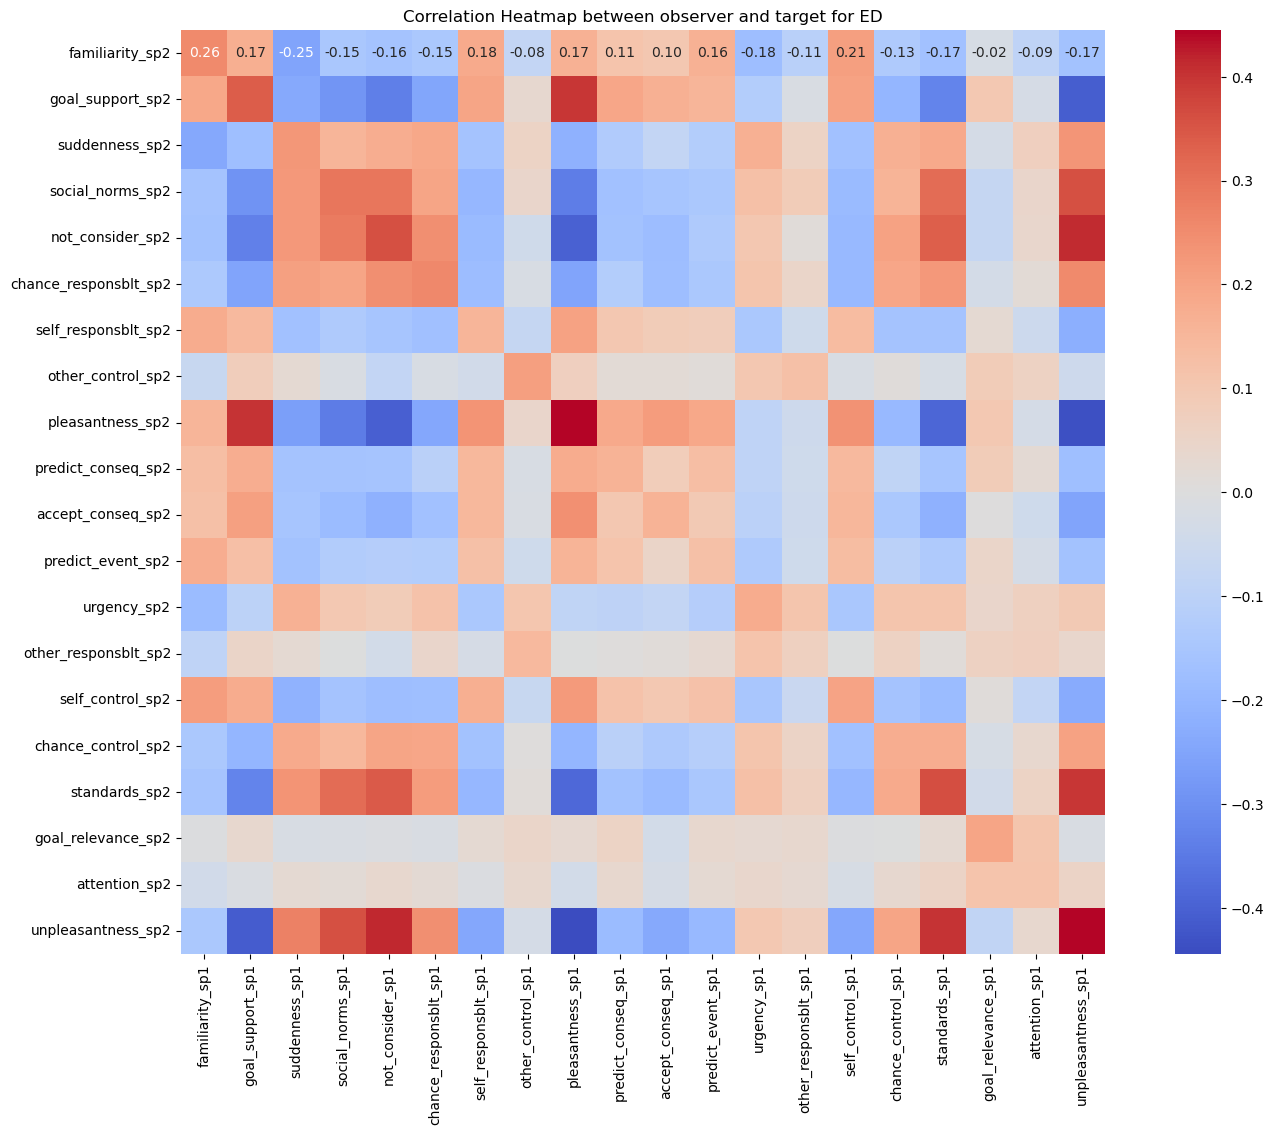

In [57]:
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap between observer and target for ED')
plt.show()

# ALOE

In [9]:
def plot_matrix(corr_matrix):
    plt.figure(figsize=(32, 24))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

In [58]:
df_aloe = pd.read_csv('./appraised_dialogues/google-t5_ALOE_train.csv')
cols = list(df_aloe.columns)
col_list = []
ind_list = []
for col in cols:
    if '_target_text' in col:
        col_list.append(col)
    elif '_observer_text' in col:
        ind_list.append(col)

df_aloe_target = df_aloe[col_list]
df_aloe_observer = df_aloe[ind_list]
# corr_matrix_aloe_corr = df_aloe_target.corrwith(df_aloe_observer)
# print(corr_matrix_aloe_corr)
# # aloe target text plot
# plot_matrix(corr_matrix_aloe_corr)

correlation_data = {}

for col in col_list:
    for ind in ind_list:
        if col not in list(correlation_data.keys()):
            correlation_data[col] = list()
        correlation_data[col].append(df_aloe_target[col].corr(df_aloe_observer[ind]))

In [59]:
correlation_df = pd.DataFrame(correlation_data, index=ind_list)
correlation_df

,familiarity_target_text,goal_support_target_text,suddenness_target_text,social_norms_target_text,not_consider_target_text,chance_responsblt_target_text,self_responsblt_target_text,other_control_target_text,pleasantness_target_text,predict_conseq_target_text,accept_conseq_target_text,predict_event_target_text,urgency_target_text,other_responsblt_target_text,self_control_target_text,chance_control_target_text,standards_target_text,goal_relevance_target_text,attention_target_text,unpleasantness_target_text
familiarity_observer_text,0.165188,-0.052507,-0.070281,-0.006658,0.020679,-0.043120,0.119800,-0.009019,-0.037962,0.108024,-0.044767,0.145818,-0.116459,-0.004555,0.136778,-0.007243,-0.105408,-0.102585,-0.109602,0.013065
goal_support_observer_text,0.048575,0.000942,0.013631,-0.015056,-0.024675,-0.036617,0.097081,-0.038658,-0.013523,0.035205,-0.023533,0.053187,0.003860,-0.081493,0.058229,-0.032569,-0.042839,-0.011507,-0.057464,-0.049504
suddenness_observer_text,-0.159026,0.005489,0.035402,0.060917,0.030141,0.007342,-0.121804,-0.030467,0.002910,-0.078960,0.028718,-0.117703,0.073648,0.076977,-0.114403,-0.012276,0.100970,0.109093,0.179862,0.068750
social_norms_observer_text,-0.098021,-0.072229,0.041973,0.134203,0.096456,-0.055883,-0.089531,0.065951,-0.070889,-0.080459,0.042553,-0.126748,0.074748,0.043298,-0.070352,-0.079330,0.160252,0.076710,0.085484,0.070977
not_consider_observer_text,-0.063251,-0.052116,0.002923,0.035879,0.051614,-0.003023,-0.057640,0.010968,-0.027442,-0.015101,0.009617,-0.056982,-0.015017,0.081951,-0.051584,-0.021369,0.067279,0.035958,0.054090,0.066040
chance_responsblt_observer_text,0.071837,-0.004295,-0.006553,-0.098285,0.000143,0.074461,0.019320,-0.037635,0.029702,0.064938,-0.021063,0.113463,-0.128166,-0.037330,0.059536,0.060948,-0.091212,-0.087047,-0.100158,0.012526
self_responsblt_observer_text,0.144837,-0.000102,-0.028675,-0.084745,-0.034106,0.069662,0.177178,-0.069948,-0.002464,0.119679,-0.049601,0.168832,-0.105796,-0.031911,0.143193,0.104335,-0.156087,-0.146111,-0.098530,-0.005755
other_control_observer_text,-0.102884,-0.039010,0.038477,0.117324,0.015724,-0.056570,-0.064803,0.039156,-0.035429,-0.058925,-0.084204,-0.129103,0.092563,0.016366,-0.102725,-0.096934,0.109849,0.117147,0.053601,-0.005189
pleasantness_observer_text,0.042915,0.044497,-0.036949,-0.056077,-0.100797,-0.039374,0.105168,-0.035780,0.060880,0.023666,-0.027538,0.013468,0.014777,-0.085948,0.035547,-0.040312,-0.084989,0.002941,-0.056652,-0.119569
predict_conseq_observer_text,0.110768,-0.028578,-0.062290,-0.018657,-0.023002,-0.041605,0.127748,-0.048671,-0.048161,0.078198,-0.066957,0.093871,-0.074811,-0.028271,0.087846,0.001352,-0.068200,-0.094056,-0.125650,0.003357


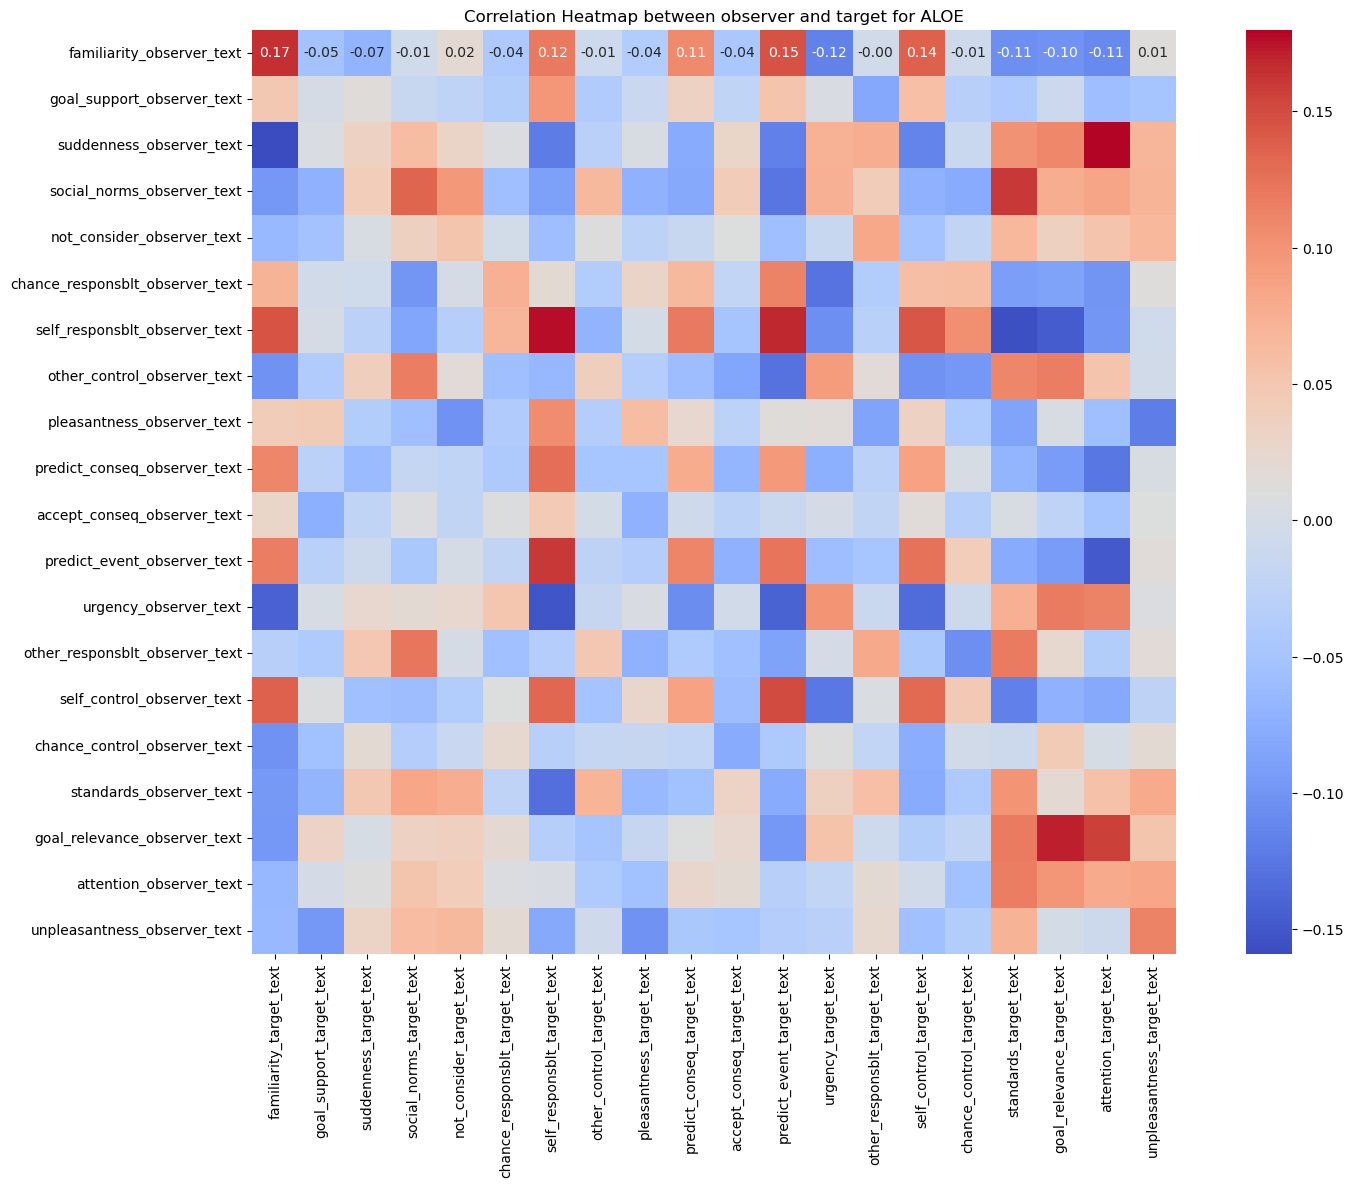

In [60]:
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap between observer and target for ALOE')
plt.show()

In [94]:
aloe_aligned_apps = [df_aloe['spans'][ix].split(',')[2] for ix in range(len(df_aloe['spans']))]
set(aloe_aligned_apps)

{" 'Advice'",
 " 'Anticipated Effort'",
 " 'Attentional Activity'",
 " 'Certainty'",
 " 'Objective Experience'",
 " 'Pleasantness'",
 " 'Self-Other Agency'",
 " 'Situational Control'",
 " 'Trope'"}

# EPITOME

In [61]:
epi_df = pd.read_csv('./appraised_dialogues/google-t5_epitome_train.csv')
cols = list(epi_df.columns)
col_list = []
ind_list = []
for col in cols:
    if '_seeker' in col:
        col_list.append(col)
    elif '_response' in col:
        ind_list.append(col)

epi_df_seeker = epi_df[col_list]
epi_df_target = epi_df[ind_list]
# corr_matrix_aloe_corr = df_aloe_target.corrwith(df_aloe_observer)
# print(corr_matrix_aloe_corr)
# # aloe target text plot
# plot_matrix(corr_matrix_aloe_corr)

correlation_data = {}

for col in col_list:
    for ind in ind_list:
        if col not in list(correlation_data.keys()):
            correlation_data[col] = list()
        correlation_data[col].append(epi_df_seeker[col].corr(epi_df_target[ind]))

In [62]:
correlation_df = pd.DataFrame(correlation_data, index=ind_list)
correlation_df

,familiarity_seeker,goal_support_seeker,suddenness_seeker,social_norms_seeker,not_consider_seeker,chance_responsblt_seeker,self_responsblt_seeker,other_control_seeker,pleasantness_seeker,predict_conseq_seeker,accept_conseq_seeker,predict_event_seeker,urgency_seeker,other_responsblt_seeker,self_control_seeker,chance_control_seeker,standards_seeker,goal_relevance_seeker,attention_seeker,unpleasantness_seeker
familiarity_response,0.150221,0.023214,-0.035681,-0.024518,0.015748,0.003210,0.063338,-0.062958,-0.018367,0.010358,0.002332,0.064148,-0.057382,-0.033160,0.112534,0.021171,-0.031407,-0.072378,-0.057290,-0.001577
goal_support_response,0.037262,0.171944,-0.066486,-0.156350,-0.135493,-0.048340,0.070006,-0.022389,0.154434,0.019353,0.032647,0.048558,-0.033375,-0.043089,0.035617,-0.002673,-0.155880,-0.024514,-0.046959,-0.172808
suddenness_response,-0.038967,-0.074532,0.045867,0.069350,0.031152,0.022369,-0.014749,0.018458,-0.052499,-0.006039,0.015838,-0.021180,0.072393,0.022316,-0.020073,-0.020364,0.061202,0.005563,0.023757,0.056307
social_norms_response,-0.042988,-0.149384,0.063142,0.210801,0.132531,0.017791,-0.076624,0.064824,-0.152162,-0.023604,-0.028710,-0.065373,0.042758,0.077433,-0.051393,-0.029753,0.193294,0.037731,0.053112,0.158400
not_consider_response,-0.019808,-0.130252,0.047895,0.144175,0.136138,0.053388,-0.050690,-0.002407,-0.122457,-0.017273,-0.026817,-0.011488,0.010360,0.026537,-0.022067,0.010941,0.130502,0.015493,0.047491,0.149523
chance_responsblt_response,-0.008848,-0.049006,0.024237,0.024103,0.047030,0.123953,-0.053273,-0.029928,-0.021164,-0.004283,-0.000694,0.006399,0.005790,-0.004810,-0.017567,0.063089,0.029652,0.006331,0.001228,0.042994
self_responsblt_response,0.096546,0.068685,-0.063886,-0.080470,-0.052102,-0.062748,0.074763,-0.042921,0.045063,0.017007,-0.007243,0.031141,-0.089431,-0.028365,0.068561,0.006314,-0.089245,-0.056015,-0.045816,-0.058897
other_control_response,-0.083599,-0.021639,0.045563,0.034413,-0.028337,0.013713,-0.022309,0.101032,-0.010847,-0.007713,0.009279,-0.037825,0.110106,0.047255,-0.041494,-0.019547,0.061986,0.038450,0.028997,0.009483
pleasantness_response,0.017962,0.162017,-0.064845,-0.172706,-0.149320,-0.043521,0.068100,-0.014888,0.157728,0.012134,0.026379,0.033072,-0.007897,-0.051448,0.026761,0.008232,-0.155971,-0.027041,-0.057079,-0.179035
predict_conseq_response,0.057880,0.035344,-0.024186,-0.076369,-0.020028,-0.002080,0.053470,-0.039218,0.027737,0.045821,0.010196,0.066779,-0.013613,-0.024526,0.067447,0.024373,-0.056375,-0.042282,-0.022858,-0.013429


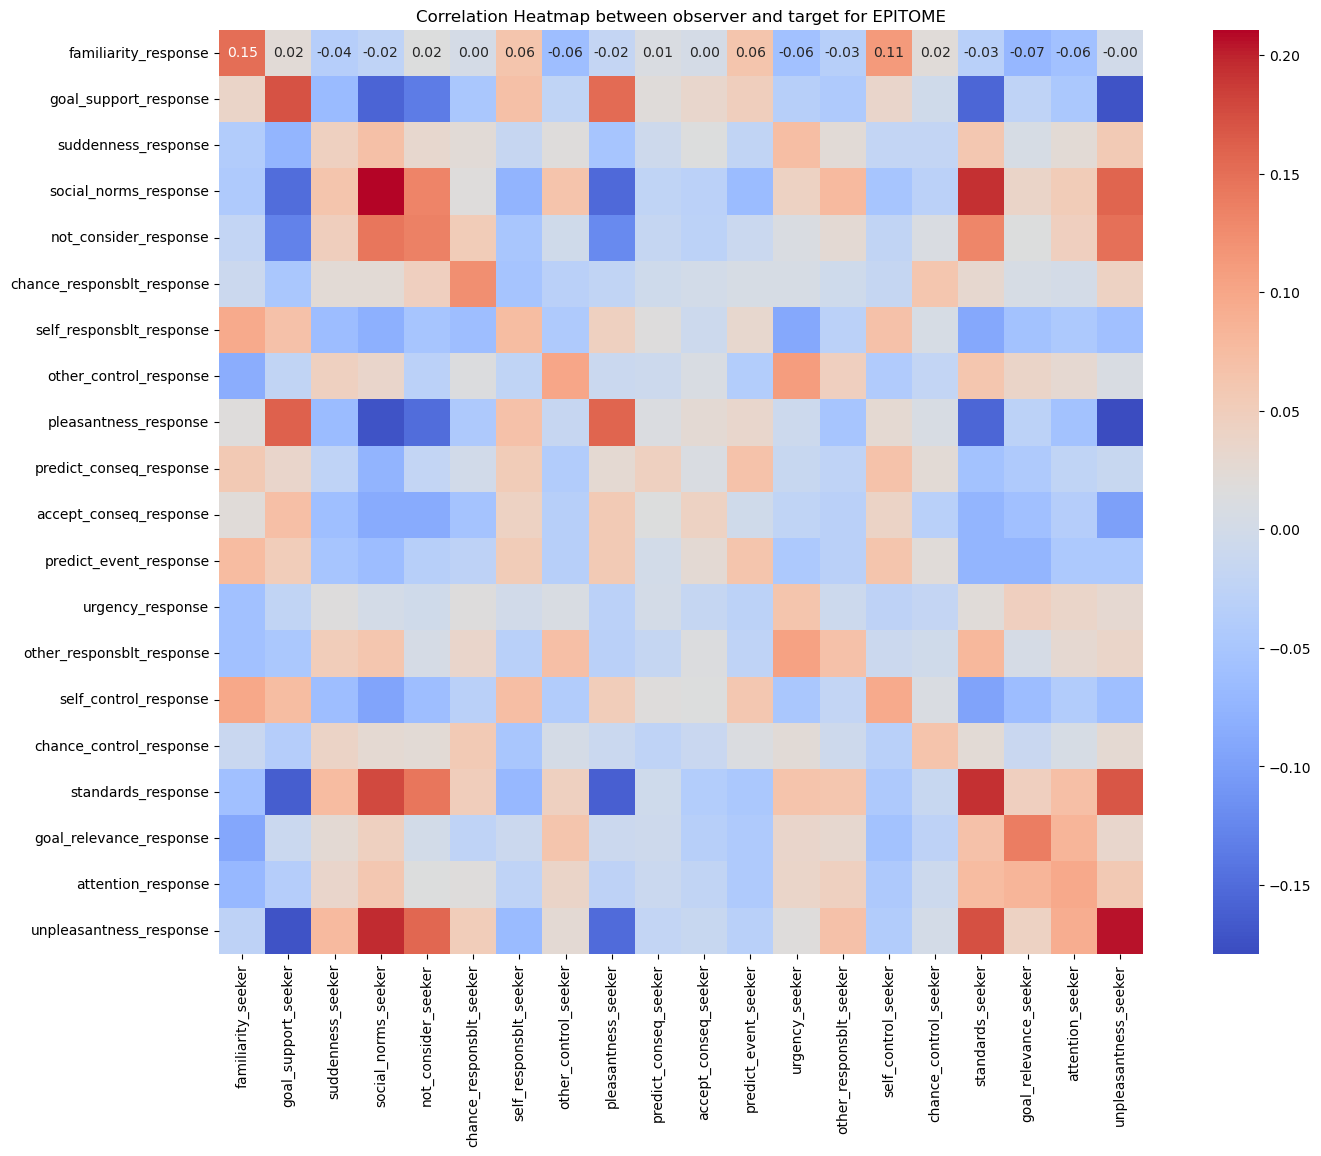

In [63]:
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap between observer and target for EPITOME')
plt.show()